<a href="https://colab.research.google.com/github/ceska68/Exercicios/blob/main/Desafio_5_Limpando_um_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
    <p style="float: right;"><img src="https://media.swipepages.com/2021/2/sirius-logo-principal-tag-1-300.png" height="80px"border="1px"></p>
    
</div>
<h1>Nano Desafio</h1>
<h2>Pandas </h2>

Aluno: Bastien

Data: 23/04/2023

###### Estima-se em torno de 70-80% do tempo e esforço total de um projeto de análise de dados é o pré-processamento.Uma das partes do processamento é o que chamamos de "data cleaning" que é  limpeza de dados e o processo de detecção e correção de registros corrompidos ou imprecisos. Isso é importante  para deixar os dados prontos para análises posteriores!
###### Por isso, chegou sua vez de ver um pouco como isso tudo acontece!

[Acesse o csv chamado Churn](https://drive.google.com/file/d/1jQYxZTvOa7qQMdF1-PNHx9_Io_rT5X9S/view?usp=sharing). Você deve limpar e deixar esse dataset pronto para análises. Não se preocupe tanto em analisar o dataset agora. Seu objetivo, por hora, é encontrar possíveis erros de input, discutir com a área de negócios e tomar algumas decisões que serão comuns quando você receber um dataset:
 - Excluir ou não uma informação;
 - inputar um valor faltante;
 - substituir valores, etc

**Obs.: churn, em poucas palavras,são os casos onde um cliente ou usuário para de comprar ou usar o produto ou serviço de uma empresa.**

1 - sua primeira tarefa é importar alguns pacotes importantes para seu trabalho:

- importe os pacotes pandas e seaborn
    

In [25]:
import pandas as pd
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2 - para trabalhar com os dados você precisa trazê-los para o Python. Faça isso:

In [18]:
df = pd.read_csv('Churn.csv', delimiter=";")

3 - agora que você trouxe os dados para o mundo maravilhoso do Python, visualize algumas linhas desse conjunto de dados, afinal você precisa conhecer esses dados não é?!!

In [19]:
df.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


4 - Notou algo estranho? Apesar de você saber do que se trata  o problema e os dados, parece que falta alguma coisa, não é?

Você não sabe quem são suas variáveis pois as colunas não estão nomeadas!! Bem Vindo ao mundo da análise de dados!!!



5 - Essa é a hora que você deveria procurar a área de negócios para descobrir o que é cada coluna!

Faça isso! Lembre-se que no dia-dia de trabalho você terá contato com várias áreas e é de suma importancia ser proativo!!!

Consulte um tutor, abra um ticket!!( ele é a sua área de negócios hoje!!) e peça a para ele te ajudar a identificar nome das colunas desse dataset!

6 - Agora que você tem os nomes das colunas, dê os nomes correspondentes:

In [49]:
df.rename(columns={'X0': 'Index', 'X1': 'Score', 'X2': 'Estado', 'X2': 'Estado', 'X2': 'Estado', 
                   'X3': 'Genero', 'X4': 'Idade', 'X4.1': 'X5', 'X6': 'X6', 'X7': 'X7',
                   'X8': 'X8', 'X9': 'X9', 'X10': 'X10', 'X11': 'X11'}, inplace=True)

7 - visualize novamente algumas linhas do seu conjunto de dados

In [50]:
df.head()

,Index,Score,Estado,Genero,Idade,X5,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


8 - Agora que você conhece um pouco melhor os dados, veja o tamanho desse conjunto de dados.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   999 non-null    int64  
 1   Score   999 non-null    int64  
 2   Estado  999 non-null    object 
 3   Genero  991 non-null    object 
 4   Idade   999 non-null    int64  
 5   X5      999 non-null    int64  
 6   X6      999 non-null    int64  
 7   X7      999 non-null    int64  
 8   X8      999 non-null    int64  
 9   X9      999 non-null    int64  
 10  X10     992 non-null    float64
 11  X11     999 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 93.8+ KB


9 - Antes de continuar sua análise, salve  esse dataset com as colunas renomeadas em um arquivo csv:

In [52]:
df.to_csv('/content/drive/MyDrive/Churn.csv', index=False)

df_salvo = pd.read_csv('/content/drive/MyDrive/Churn.csv')

df_salvo.head()

,Index,Score,Estado,Genero,Idade,X5,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


10 - No mundo da análise de dados as colunas(que são as variáveis) podem ser numéricas ou categóricas. Você verá isso com mais precisão no curso de estatística, porém aqui variaveis categóricas serão representadas por letras, por exemplo cor dos olhos(preto, azul, verde, castanho) e variáveis numéricas serão representadas por números, por exemplo quantidade de filhos(1,2,3,4,etc).

Disto isso vamos explorar as variáveis categóricas:

11 - Explore a variável *Estado* vendo como as pessoas estão distribuídas nos estados!

In [33]:
df.groupby(['Estado'])[['Index']].count()

,Index
Estado,
PR,257
RP,1
RS,478
SC,258
SP,4
TD,1


12 - Não é obrigatório, mas não menos importante, você conseguiria fazer um gráfico de barras com a contagem que fez acima?

Você pode consultar aqui a documentação do pandas e gráficos de barras:
    
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

<Axes: xlabel='Estado'>

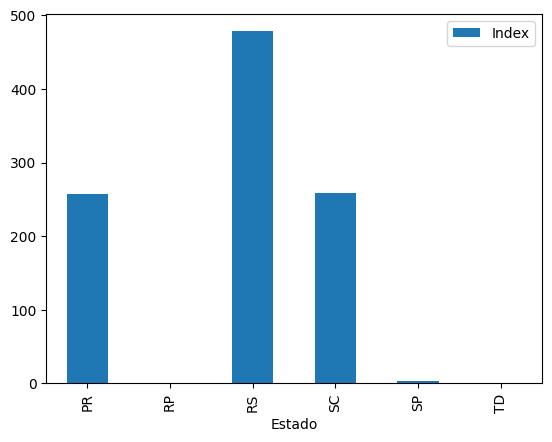

In [40]:
df.groupby(['Estado'])[['Index']].count().plot(kind='bar')

13 - Você chegou até aqui? Consulte novamente a área de negócios pois eles tem uma informação importante para te passar.



14 - Explore a variável *genero* vendo como essa variável está distribuida!

In [39]:
df.groupby(['Genero'])[['Index']].count()

,Index
Genero,
F,2
Fem,1
Feminino,461
M,6
Masculino,521


15 - Consegue ver a mesma informação graficamente?

<Axes: xlabel='Genero'>

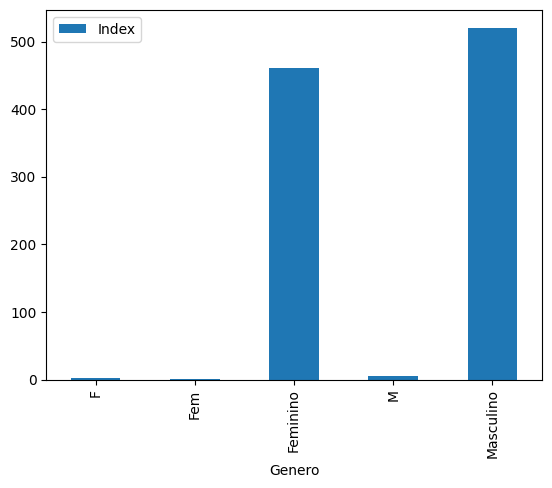

In [41]:
df.groupby(['Genero'])[['Index']].count().plot(kind='bar')

16 - Notou algo estranho? Acho que seu grupo precisa tomar uma decisão em relação a essa variável, o que farão?
Pode consultar a área de negócios se quiser ampliar a discussão!!

In [42]:
df['Genero'] = df['Genero'].replace(['F','Fem'], 'Feminino')
df['Genero'] = df['Genero'].replace('M', 'Masculino')

<Axes: xlabel='Genero'>

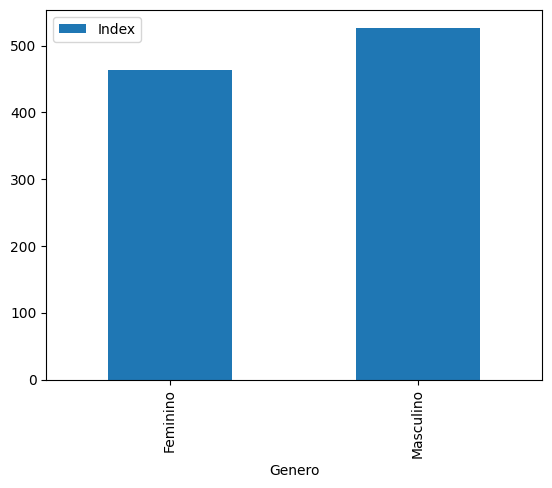

In [44]:
df.groupby(['Genero'])[['Index']].count().plot(kind='bar')

17 - Ainda na variável genero, veja se há dados faltantes:

In [53]:
print(df['Genero'].unique())

['Feminino' 'Masculino' nan]


18 - Decida o que irá fazer com esses dados e faça as alterações no dataset:

In [61]:
df['Genero'] = df['Genero'].fillna('Não Determinado')

In [62]:
print(df['Genero'].unique())

['Feminino' 'Masculino' 'Não Determinado']


19- Vamos agora explorar um pouco as variáveis numéricas! Veja algumas estatísticas da variável(coluna) 'Score':

Maximo, minimo, média etc


In [76]:
mean = df['Score'].mean()
max = df['Score'].max()
min = df['Score'].min()
std = df['Score'].std()

print(f'a média é de {round(mean,2)}.')
print(f'o máximo é de {max}.')
print(f'a mínimo é de {min}.')
print(f'o desvio padrão é de {round(std,2)}.')

a média é de 648.62.
o máximo é de 850.
a mínimo é de 376.
o desvio padrão é de 98.26.


20 - Conseguiria fazer um boxplot desssa variável

Pode consultar a documentação:

- Usando pandas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html
- Usando seaborn: https://seaborn.pydata.org/generated/seaborn.boxplot.html


<Axes: >

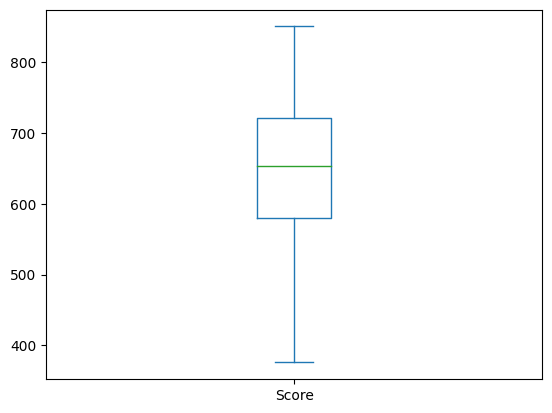

In [77]:
df[['Score']].plot(kind = 'box')

<Axes: ylabel='Score'>

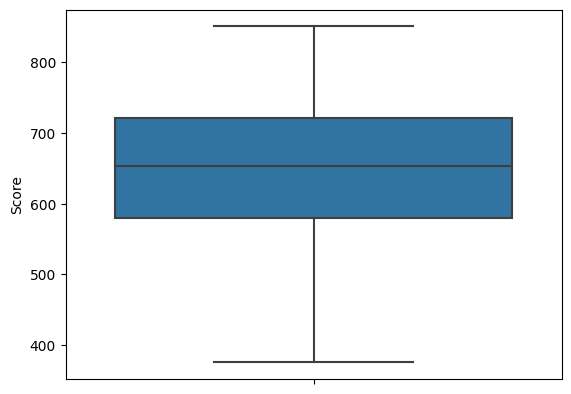

In [79]:
sns.boxplot(y=df["Score"])

21 - Uma forma de verificar a distribuição de uma variável continua é fazendo um histograma. Você poderia fazer um?

Documentação:
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html
- https://seaborn.pydata.org/generated/seaborn.histplot.html

<Axes: ylabel='Frequency'>

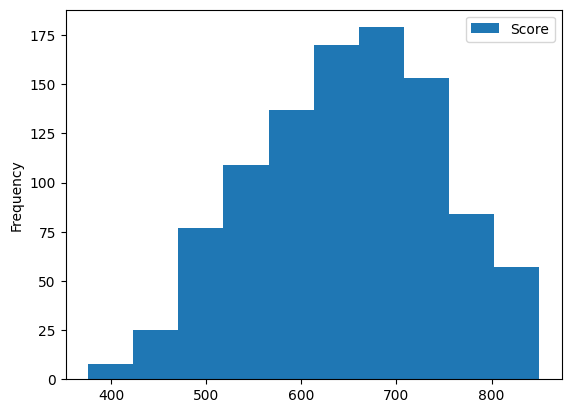

In [80]:
df[['Score']].plot(kind = 'hist')

<Axes: xlabel='Score', ylabel='Count'>

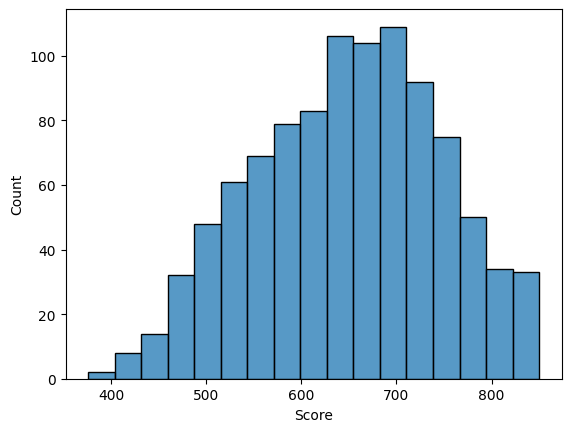

In [83]:
sns.histplot(x=df["Score"])

22 - Veja algumas estatísticas da variável(coluna) 'Idade':

In [84]:
mean = df['Idade'].mean()
max = df['Idade'].max()
min = df['Idade'].min()
std = df['Idade'].std()

print(f'a média da idade é de {round(mean,2)}.')
print(f'o máximo da idade é de {max}.')
print(f'a mínimo da idade é de {min}.')
print(f'o desvio padrão da idade é de {round(std,2)}.')

a média da idade é de 38.9.
o máximo da idade é de 140.
a mínimo da idade é de -20.
o desvio padrão da idade é de 11.4.


23 - Notou algo estranho? Discuta com seu grupo!! 

Existe um valor negativo.

24 - Como sugestão faça novamente um boxplot ou um histograma dessa variável.

<Axes: ylabel='Idade'>

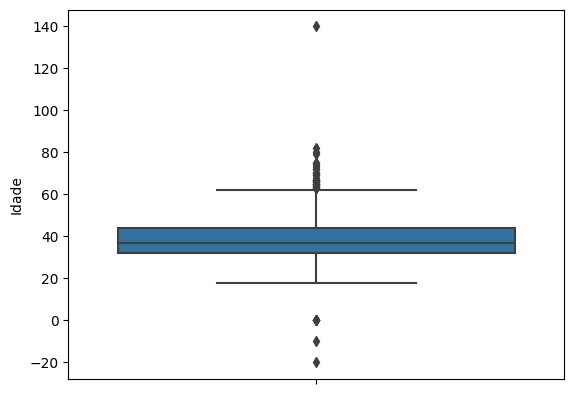

In [85]:
sns.boxplot(y=df["Idade"])

25 - Que decisão seu grupo irá tomar em relação a variável idade? Implemente as mudança que vocês dicutiram.

In [ ]:
A sugestão é deixar como branco os valores negativos

In [87]:
df['Idade'] = df['Idade'].mask(df['Idade']< 0) 

<Axes: ylabel='Idade'>

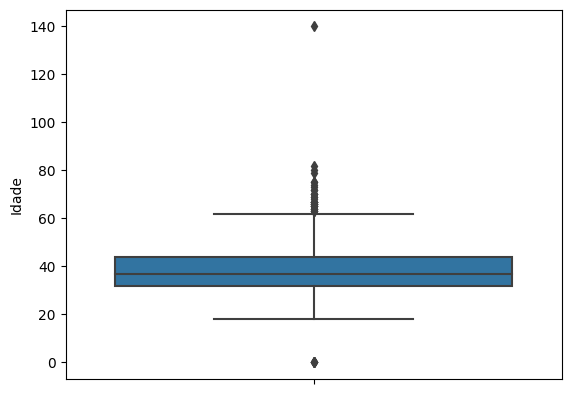

In [88]:
sns.boxplot(y=df["Idade"])

26 - Verifique a variável saldo, ou seja exiba algumas estatísticas

27 - Faça um boxplot da variável saldo

28 - Examine a variável salário fazendo algumas estatísticas

29 -  Não deu para ver muita coisa, não é? Use agora o poder da visualização! Faça um boxplot!

30 - O que você acha que aconteceu? Por quê não aparece o boxplot! Tente um histograma!!

31 - Discuta com o grupo! Consulte a área de negócio! Os dados estão corretos?

In [ ]:
#Supondo que são outliers! O que é isso:
##Os outliers são dados que se diferenciam drasticamente de todos os outros.
#Em outras palavras, um outlier é um valor que foge da normalidade e que pode (e provavelmente irá)
#causar anomalias nos resultados obtidos por meio de algoritmos e sistemas de análise.

32 - A área de negocio informou que o valor salario não pode passar  de R$1061159976.6. E agora, como resolver! Discuta com o grupo!

33 - Agora veja se o dataset tem algum valor nulo!

34 - Há alguns nulos na variável salário. Discuta com o grupo o que fazer!!

0

35 -Parabéns por ter chegado até aqui!!